## Описание данных и постановка задачи:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.patches as mpatches
import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Будем загружать данные, полученные в предыдущем блокноте.
# См обновленный блокнот

new_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard_short.csv')
new_df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,204308,135216.0,2.113178,-0.020820,-1.340207,0.247373,0.249065,-0.804040,0.210796,-0.325727,...,-0.328126,-0.775125,0.248150,-0.637815,-0.184858,0.236809,-0.067417,-0.065772,0.89,0
1,147788,88987.0,-0.042450,1.071221,-0.534238,-1.166553,1.299519,-1.627177,2.048615,-0.861235,...,0.103342,0.900343,-0.316427,-0.055906,-0.346582,0.046074,0.172124,-0.120783,0.77,0
2,284045,172103.0,1.978331,0.677818,-1.058538,3.529116,0.922361,0.181223,0.298112,-0.125356,...,0.212678,0.627054,0.060562,0.416969,0.192153,0.119225,-0.044195,-0.047893,2.28,0
3,40508,40270.0,-0.370008,0.954001,0.600378,0.990745,-0.350611,-0.379538,0.251229,0.502200,...,0.196572,0.369816,0.069940,0.026130,-0.261750,-0.292522,-0.050989,-0.023663,40.11,0
4,40842,40425.0,1.193166,0.689752,-0.001028,2.296480,0.441218,-0.321879,0.490221,-0.135901,...,0.023728,0.010253,-0.169758,0.005560,0.751653,0.069991,-0.043502,-0.001331,11.75,0


In [4]:
new_df.describe()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,...,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,144258.707031,95700.878906,0.820982,0.072697,0.084579,0.229936,-0.173274,-0.428273,0.049449,-0.006823,...,-0.038278,-0.032076,0.009673,0.087127,0.052438,-0.067623,0.028383,0.011123,44.288750,0.082031
std,80044.103455,45947.795042,1.070686,0.792279,1.171505,1.287836,0.809907,0.597074,0.710748,0.279511,...,0.249416,0.687243,0.189574,0.442530,0.416341,0.363960,0.101215,0.065042,74.963181,0.274950
min,779.000000,589.000000,-1.504584,-2.786363,-2.785948,-3.041622,-2.329162,-1.972422,-2.127632,-0.861235,...,-0.799791,-1.995224,-0.414960,-1.057476,-1.015167,-0.960498,-0.209744,-0.164702,0.000000,0.000000
25%,71474.500000,54307.500000,-0.239427,-0.378309,-0.734641,-0.660847,-0.687203,-0.829807,-0.408216,-0.201216,...,-0.238154,-0.599114,-0.110301,-0.199364,-0.287573,-0.325570,-0.036852,-0.037229,2.580000,0.000000
50%,139624.500000,83292.500000,1.161942,0.144084,0.193986,0.189370,-0.224590,-0.504581,0.078304,-0.022380,...,-0.045285,-0.051830,-0.009212,0.072427,0.075423,-0.098575,0.007249,0.015416,14.490000,0.000000
75%,218806.750000,141469.000000,1.828549,0.645989,0.964745,0.931364,0.389675,-0.011033,0.491318,0.155520,...,0.152045,0.469975,0.131443,0.414982,0.368243,0.151606,0.068423,0.041707,49.675000,0.000000
max,284045.000000,172103.000000,2.327157,1.932587,2.995455,4.425053,1.836728,1.300389,3.071892,1.011129,...,0.496182,1.663101,0.516634,1.141207,1.005684,0.932913,0.300921,0.175091,549.060000,1.000000


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard_full.csv')
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,120502,75849.0,1.207149,1.198063,-1.397083,1.788805,0.434367,-2.173857,0.681740,-0.331268,...,-0.193027,-0.537324,-0.124465,0.549680,0.732565,-0.322035,0.030126,0.099137,1.99,0
1,47980,43444.0,1.241398,0.369538,0.092515,1.126917,-0.175009,-1.076132,0.359546,-0.262188,...,-0.030594,-0.083214,-0.095611,0.376530,0.710798,-0.357288,-0.001047,0.017115,11.87,0
2,284045,172103.0,1.978331,0.677818,-1.058538,3.529116,0.922361,0.181223,0.298112,-0.125356,...,0.212678,0.627054,0.060562,0.416969,0.192153,0.119225,-0.044195,-0.047893,2.28,0
3,214286,139609.0,1.379658,-2.259250,-0.948500,-0.480681,-1.605138,-0.631191,-0.303987,-0.229413,...,-0.589849,-1.995224,0.226931,-0.130028,-1.015167,0.732265,-0.142691,0.015778,407.92,0
4,284485,172488.0,-2.259947,1.733664,1.317735,1.067162,-1.271256,1.056841,-1.319488,1.806360,...,-0.024253,0.123446,-0.218385,0.605962,0.696502,-0.362719,0.251333,0.073333,10.00,0


In [6]:
df.describe()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,142403.000000,94813.859575,1.177756e-15,3.383727e-16,-1.399845e-15,2.093355e-15,1.005613e-15,1.496095e-15,-5.630314e-16,1.146620e-16,...,1.606665e-16,-3.510339e-16,2.622058e-16,4.472754e-15,5.147067e-16,1.685502e-15,-3.658157e-16,-1.223960e-16,88.349619,0.001727
std,82216.843396,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,71201.500000,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,142403.000000,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,213604.500000,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,284806.000000,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# Обычное обучение

In [8]:
# Про масштабирование мы с вами уже в курсе. Опять используем RobustScaler

from sklearn.model_selection import train_test_split
# Поскольку большая часть наших данных уже масштабирована, мы должны масштабировать столбцы,
# которые остались (Amount и Time)
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,
                                                    stratify = y)

X_train['scaled_amount'] = rob_scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['scaled_amount'] = rob_scaler.fit_transform(X_test['Amount'].values.reshape(-1,1))

X_train['scaled_time'] = rob_scaler.fit_transform(X_train['Time'].values.reshape(-1,1))
X_test['scaled_time'] = rob_scaler.fit_transform(X_test['Time'].values.reshape(-1,1))


# удаляем из трейн и тест датасетов  столбцы Time и Amount,
# так как у нас уже есть их отмасштабированные версии
X_train.drop(['Time','Amount'], axis=1, inplace=True)
X_test.drop(['Time','Amount'], axis=1, inplace=True)

In [9]:
# Переводим данные в массив для подачи в классификатор
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Выберем несколько простых моделей из библиотеки sklearn

classifiers = {
    "LogisiticRegression": LogisticRegression(),  # Логистическая регрессия
    "KNearest": SVC(),  # Метод опорных векторов
    "Support Vector Classifier": KNeighborsClassifier(),# Метод ближайших соседей
    "DecisionTreeClassifier": DecisionTreeClassifier() # Решающее дерево
}

In [11]:
# from sklearn.model_selection import cross_val_score

# for key, classifier in classifiers.items():
#     #classifier.fit(X_train, y_train)
#     training_score = cross_val_score(classifier, X_train, y_train, cv=5)
#     print("Модель ", classifier.__class__.__name__, "получила на обучающей выборке", round(training_score.mean(), 2) * 100, "% accuracy score")

from sklearn.model_selection import cross_val_score

mas = {"LogisiticRegression":[], "KNearest":[], "Support Vector Classifier":[], "DecisionTreeClassifier":[]}

for key, classifier in classifiers.items():
    #classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    accuracy = round(training_score.mean(), 2) * 100
    mas[key].append(accuracy)  # Сохраняем оценку в словарь
    print(f"Модель {key} получила на обучающей выборке {accuracy} % accuracy score")

Модель LogisiticRegression получила на обучающей выборке 90.0 % accuracy score
Модель KNearest получила на обучающей выборке 92.0 % accuracy score
Модель Support Vector Classifier получила на обучающей выборке 91.0 % accuracy score
Модель DecisionTreeClassifier получила на обучающей выборке 87.0 % accuracy score


In [12]:
print("\nОкончательные результаты:")
for key, scores in mas.items():
    print(f"{key}: {scores}")


Окончательные результаты:
LogisiticRegression: [90.0]
KNearest: [92.0]
Support Vector Classifier: [91.0]
DecisionTreeClassifier: [87.0]


# GridSearchCV

Для улучшения качества моделей переберем по сетке различные гиперпараметры методом GridSearchCV.


In [13]:
# Используем поиск по сетке для подбора гиперпараметров
from sklearn.model_selection import GridSearchCV

# Логистическая регрессия
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)

# Выбираем лучшую модель
log_reg = grid_log_reg.best_estimator_ #  для Логистическая регрессия

# Метод ближайших соседей
knears_params = {"n_neighbors": list(range(2,7,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)

knears_neighbors = grid_knears.best_estimator_# для  K ближайший соседей

# Метод опорных векторов
x = [1.0, 1000.0]
y = [0.9]
z = [4]
svc_params=[
            {'C': x,'kernel': ['rbf'],'gamma': y} ,
            {'C': x,'kernel': ['poly'],'gamma': y,'degree': z}
           ]
grid_svc=GridSearchCV(estimator = SVC(),
                        param_grid = svc_params,
                        scoring='accuracy',
                        cv=3,
                        n_jobs=-1)

grid_svc.fit(X_train, y_train)

svc = grid_svc.best_estimator_#  для SVM

# Решающее дерево
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,7,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

tree_clf = grid_tree.best_estimator_#  для решающий деревьев

In [14]:
# Проверим, как поменялись метрики

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score', round(log_reg_score.mean() * 100, 2).astype(str) + '%')
mas["LogisiticRegression"].append(round(log_reg_score.mean() * 100, 2))

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')
mas["KNearest"].append(round(knears_score.mean() * 100, 2))

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')
mas["Support Vector Classifier"].append(round(svc_score.mean() * 100, 2))

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')
mas["DecisionTreeClassifier"].append(round(tree_score.mean() * 100, 2))

Logistic Regression Cross Validation Score 91.67%
Knears Neighbors Cross Validation Score 91.67%
Support Vector Classifier Cross Validation Score 91.67%
DecisionTree Classifier Cross Validation Score 91.67%


In [15]:
print("\nОкончательные результаты:")
for key, scores in mas.items():
    print(f"{key}: {scores}")


Окончательные результаты:
LogisiticRegression: [90.0, 91.67]
KNearest: [92.0, 91.67]
Support Vector Classifier: [91.0, 91.67]
DecisionTreeClassifier: [87.0, 91.67]


Давайте теперь попробуем более умные способы undersampling. Например, с помощью NearMiss, который оценивает среднее расстояние между классами. Поможет нам в этом специальная библиотека для работы с несбалансированными даннными imblearn.

In [16]:
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

from sklearn.metrics import (precision_score, roc_auc_score, recall_score, f1_score, classification_report,
                             confusion_matrix, roc_curve, precision_recall_curve, accuracy_score)

undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

undersample_Xtrain, undersample_Xtest, undersample_ytrain, undersample_ytest = train_test_split(undersample_X, undersample_y,
                                                                                                test_size = 0.2,
                                                                                                random_state=42,
                                                                                                stratify = undersample_y)#

undersample_Xtrain['scaled_amount'] = rob_scaler.fit_transform(undersample_Xtrain['Amount'].values.reshape(-1,1))#
undersample_Xtest['scaled_amount'] = rob_scaler.fit_transform(undersample_Xtest['Amount'].values.reshape(-1,1))#

undersample_Xtrain['scaled_time'] = rob_scaler.fit_transform(undersample_Xtrain['Time'].values.reshape(-1,1))#
undersample_Xtest['scaled_time'] = rob_scaler.fit_transform(undersample_Xtest['Time'].values.reshape(-1,1))#

undersample_Xtrain.drop(['Time','Amount'], axis=1, inplace=True)
undersample_Xtest.drop(['Time','Amount'], axis=1, inplace=True)

undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Метод NearMiss
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss распределение классов: {}'.format(Counter(y_nearmiss)))
# Использовать сэмплирование будем во время кросс-валидации

for train, test in skf.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)#
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])#
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])#

    undersample_accuracy.append(undersample_pipeline.score(undersample_Xtrain[test],
                                                           undersample_ytrain[test]))
    undersample_precision.append(precision_score(undersample_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_ytrain[test], undersample_prediction))

NearMiss распределение классов: Counter({0: 492, 1: 492})


Построим кривую обучение каждой из модели. Данная кривая показывает различие между метриками во время обычного обучения и во время кросс-валидации.

In [17]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
import seaborn as sn

In [45]:
def plot_learning_curves(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20, 14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)

    # Первая модель
    train_sizes, train_scores, test_scores = learning_curve(estimator1, X, y, cv=cv,
                                                            n_jobs=n_jobs, train_sizes=train_sizes)#
    train_scores_mean = np.mean(train_scores, axis=1)#
    train_scores_std = np.std(train_scores, axis=1)#
    test_scores_mean = np.mean(test_scores, axis=1)#
    test_scores_std = np.std(test_scores, axis=1)#
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Размер выборки')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # Вторая модель
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Размер выборки')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")


    # Третья модель
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Размер выборки")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")


    # Четвертая модель
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Размер выборки")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")

    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

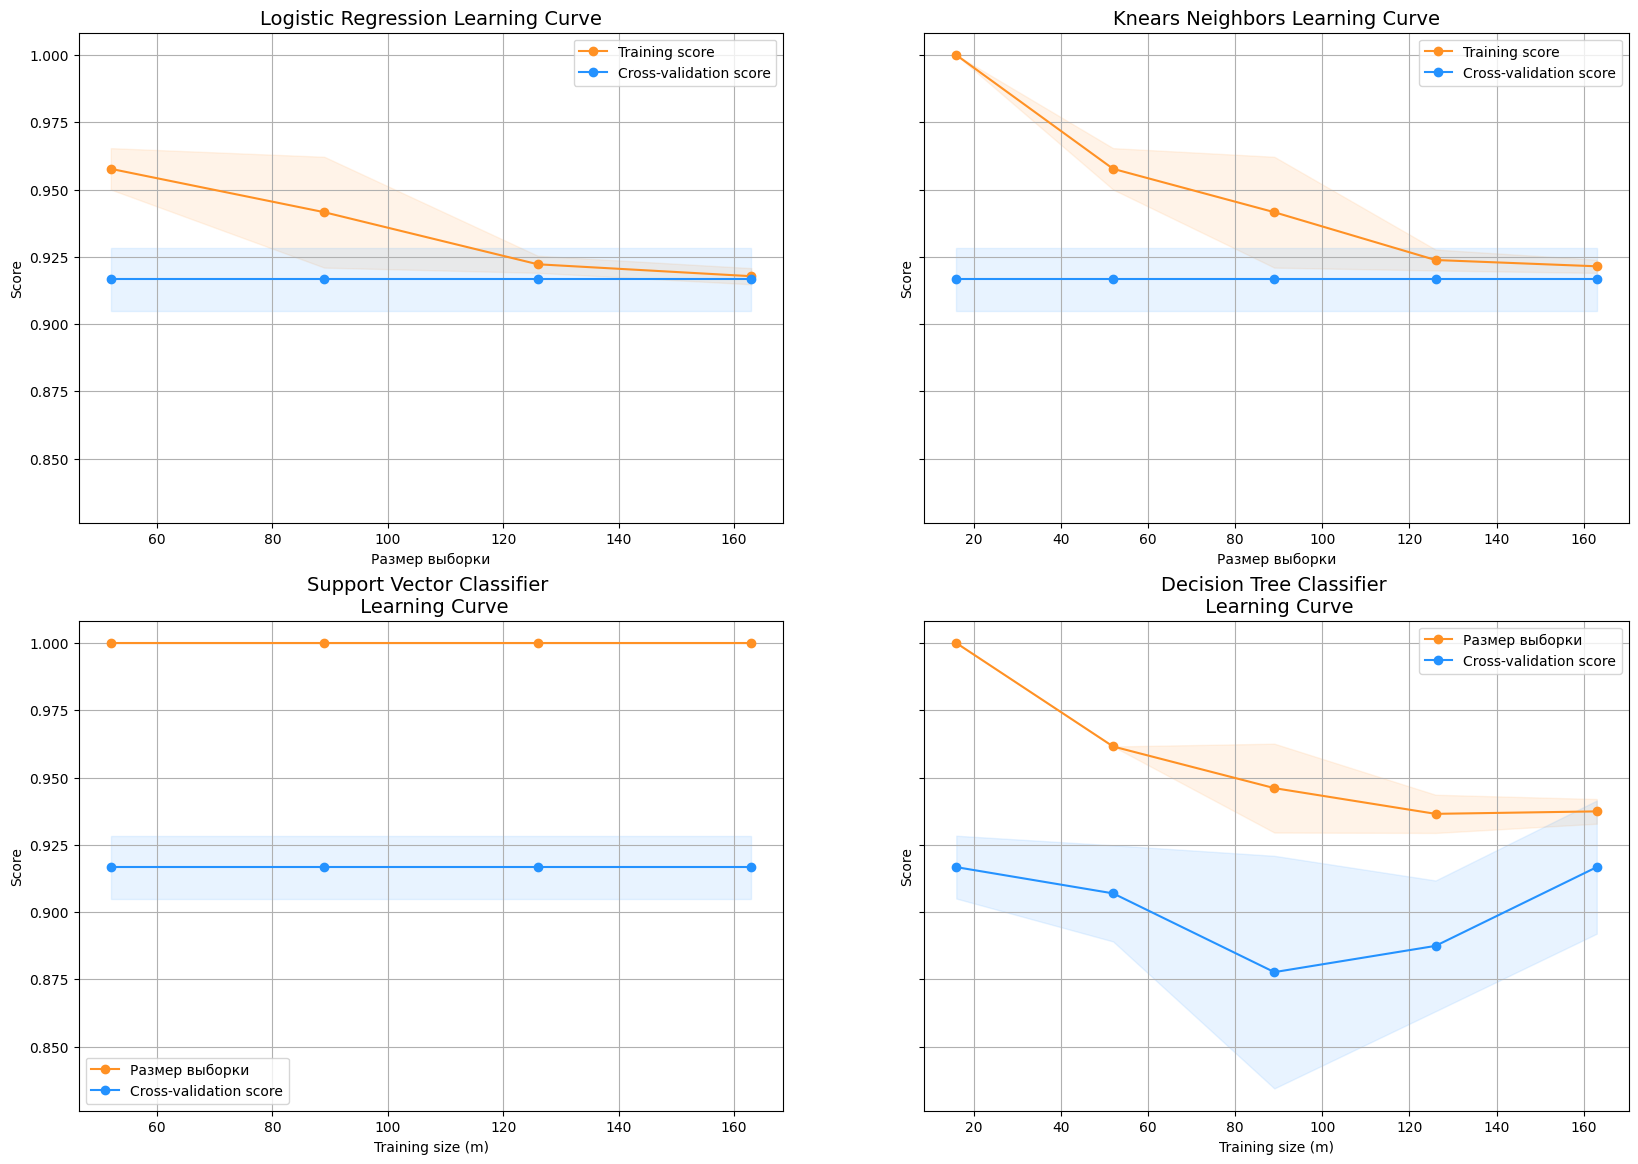

In [46]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curves(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train)

# Кривые обучения:
<ul>
<li>Чем больше разрыв между результатами обучения и результатами кросс-валидации, тем больше вероятность того, что модель переобучилась (большой разброс).</li>
<li> Если результаты низкие как на обучающем, так и на кросс-валидационном наборе, это указывает на то, что наша модель недообучилась (большое смещение).</li>
<li>Логистическая регрессия показала себя лучше остальных.</li>
</ul>

In [20]:
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [21]:
print('Logistic Regression: ', round(roc_auc_score(y_train, log_reg_pred) * 100, 2).astype(str) + '%')
print('KNears Neighbors: ', round(roc_auc_score(y_train, knears_pred) * 100, 2).astype(str) + '%')
print('Support Vector Classifier: ', round(roc_auc_score(y_train, svc_pred) * 100, 2).astype(str) + '%')
print('Decision Tree Classifier: ', round(roc_auc_score(y_train, tree_pred) * 100, 2).astype(str) + '%')

mas["LogisiticRegression"].append(round(roc_auc_score(y_train, log_reg_pred) * 100, 2))
mas["KNearest"].append(round(roc_auc_score(y_train, knears_pred) * 100, 2))
mas["Support Vector Classifier"].append(round(roc_auc_score(y_train, svc_pred) * 100, 2))
mas["DecisionTreeClassifier"].append(round(roc_auc_score(y_train, tree_pred) * 100, 2))

Logistic Regression:  50.46%
KNears Neighbors:  50.0%
Support Vector Classifier:  46.16%
Decision Tree Classifier:  60.7%


In [22]:
print("\nОкончательные результаты:")
for key, scores in mas.items():
    print(f"{key}: {scores}")


Окончательные результаты:
LogisiticRegression: [90.0, 91.67, 50.46]
KNearest: [92.0, 91.67, 50.0]
Support Vector Classifier: [91.0, 91.67, 46.16]
DecisionTreeClassifier: [87.0, 91.67, 60.7]


Построим roc-кривую и посчитаем площадь под ней.

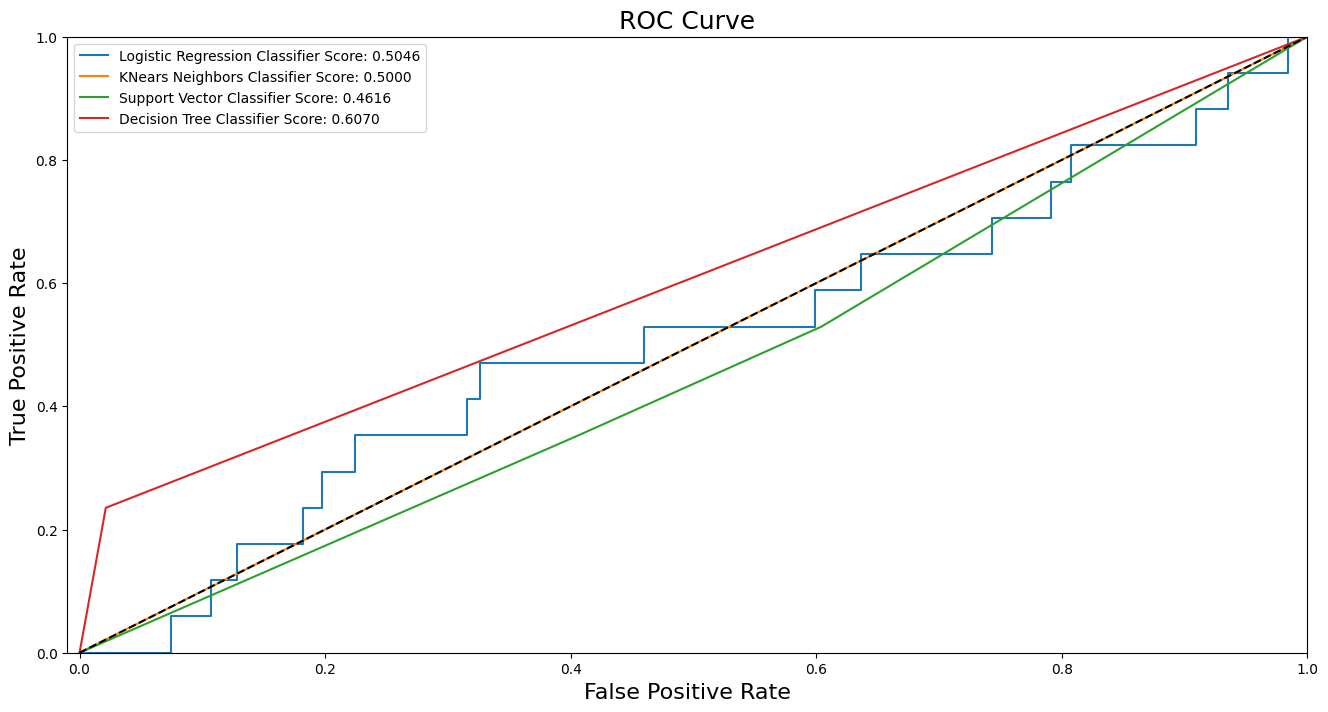

In [23]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)#
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)#
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)#
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)#


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

# <b>SMOTE</b>
выбирает расстояние между ближайшими соседями меньшего класса и между ними создает синтетические точки для баланса классов. </li>


Попробуем в качестве алгоритм подбора гиперпараметров случайный поиск. Он работает быстрее, чем поиск по сетке.

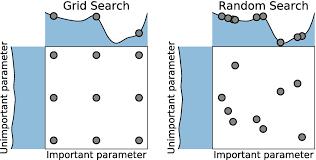

In [24]:
from sklearn.model_selection import train_test_split
# Поскольку большая часть наших данных уже масштабирована, мы должны масштабировать столбцы,
# которые остались (Amount и Time)
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler() # Менее чувствителен к выбросам, чем просто стандартизация

X = df.drop('Class', axis=1)
y = df['Class']

original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2,
                                                                                    random_state = 42)


original_Xtrain['scaled_amount'] = rob_scaler.fit_transform(original_Xtrain['Amount'].values.reshape(-1,1))
original_Xtest['scaled_amount'] = rob_scaler.fit_transform(original_Xtest['Amount'].values.reshape(-1,1))

original_Xtrain['scaled_time'] = rob_scaler.fit_transform(original_Xtrain['Time'].values.reshape(-1,1))
original_Xtest['scaled_time'] = rob_scaler.fit_transform(original_Xtest['Time'].values.reshape(-1,1))

original_Xtrain.drop(['Time','Amount'], axis=1, inplace=True)
original_Xtest.drop(['Time','Amount'], axis=1, inplace=True)

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Распределение классов: \n')
print("Обучающий набор:", train_counts_label/ len(original_ytrain))
print("Тестовый набор:", test_counts_label/ len(original_ytest))

Распределение классов: 

Обучающий набор: [0.99828392 0.00171608]
Тестовый набор: [0.99822689 0.00177311]


In [25]:
# сохраним параметры наших классификаторов, на которых они показали лучших результат с GridSearchCV

#dictionary of classifiers objects which we got in the above cell via GridSearchCV
#with the tuned parameters
tuned_classifiers = {
    "LogisiticRegression": log_reg,
    "KNearest": knears_neighbors,
    "Support Vector Classifier": svc,
    "DecisionTreeClassifier": tree_clf
}

#Making our Classifiers train with the tuned parameters
for key, classifier in tuned_classifiers.items():
    score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f'{key} Cross Validation Score: {round(score.mean() * 100, 2)}%')

LogisiticRegression Cross Validation Score: 91.67%
KNearest Cross Validation Score: 91.67%
Support Vector Classifier Cross Validation Score: 91.67%
DecisionTreeClassifier Cross Validation Score: 91.67%


In [26]:
#Over Sampling and under sampling libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Machine learning Pipeline libraries
from imblearn.pipeline import Pipeline



# here we are using the imbalanced dataset
X = df.drop('Class', axis=1)
y = df['Class']



# StratifiedKFold is used for cross validation
# This cross-validation object is a variation of KFold that returns stratified folds.
# The folds are made by preserving the percentage of samples for each class.
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# creating the object for Over Sampling the minority class
over = SMOTE(sampling_strategy=0.01,k_neighbors=5)

# creating the object for Under Sampling the majority class
under = RandomUnderSampler(sampling_strategy=0.5)

# iterating thru the dictionary of tuned classifiers
for key, classifier in tuned_classifiers.items():

    # list of steps to be provided to the ML Pipeline
    steps=[('o',over),('u',under),('model',classifier)]

    # Creating a ML Pipeline
    FiPipeline=Pipeline(steps=steps)

    # Cross validating the classifiers
    scores=cross_val_score(FiPipeline,X,y,cv=sss)
    accuracy = round(scores.mean() * 100, 2)
    mas[key].append(accuracy)
    # Printing the mean accuracy score
    print(f"Classifiers: {key} Has a training score of, {accuracy} % accuracy score")

Classifiers: LogisiticRegression Has a training score of, 99.07 % accuracy score
Classifiers: KNearest Has a training score of, 92.91 % accuracy score
Classifiers: Support Vector Classifier Has a training score of, 99.83 % accuracy score
Classifiers: DecisionTreeClassifier Has a training score of, 98.76 % accuracy score


In [27]:
print("\nОкончательные результаты:")
for key, scores in mas.items():
    print(f"{key}: {scores}")


Окончательные результаты:
LogisiticRegression: [90.0, 91.67, 50.46, 99.07]
KNearest: [92.0, 91.67, 50.0, 92.91]
Support Vector Classifier: [91.0, 91.67, 46.16, 99.83]
DecisionTreeClassifier: [87.0, 91.67, 60.7, 98.76]


In [28]:
# taking a fold of a data to do GridSearchCV for best parameters for SMOTE
for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# creating a ML pipeline
model = Pipeline([
        ('sampling', SMOTE(sampling_strategy=0.01)),
        ('Random',RandomUnderSampler(sampling_strategy=0.5)),
        ('classification', log_reg)
    ])

# Running GridSearchCV on our ML pipeline by varying the k_neighbors from 1 to 10
# to find the best k_neighbors parameter value
# NOTE :- in paramgrid use above key + 2 _ followed by parameter
SMOTE_KN = GridSearchCV(model,{'sampling__k_neighbors':list(range(1,10))})
SMOTE_KN.fit(original_Xtrain,original_ytrain)

print(SMOTE_KN.best_estimator_)
print(SMOTE_KN.best_score_)
print(SMOTE_KN.best_params_)

# Training logistic regression classifier using SMOTE best parameter value for k_neighbors parameter
log_reg_score = cross_val_score(SMOTE_KN.best_estimator_, original_Xtrain, original_ytrain, cv=5)

# printing the mean accuracy score
print(f'Logistic Regression Cross Validation Score: {round(log_reg_score.mean() * 100, 2)}%')

Pipeline(steps=[('sampling', SMOTE(k_neighbors=6, sampling_strategy=0.01)),
                ('Random', RandomUnderSampler(sampling_strategy=0.5)),
                ('classification', LogisticRegression(C=0.001))])
0.9923062089807086
{'sampling__k_neighbors': 6}
Logistic Regression Cross Validation Score: 99.17%


Лучший вариант к-соседей - 7. Оценка: 98.75

In [29]:
labels = ['Non Fraud', 'Fraud']

best_est = SMOTE_KN.best_estimator_
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

   Non Fraud       1.00      0.99      1.00     56863
       Fraud       0.14      0.86      0.23        98

    accuracy                           0.99     56961
   macro avg       0.57      0.92      0.61     56961
weighted avg       1.00      0.99      0.99     56961



In [30]:
y_score = best_est.decision_function(original_Xtest)

In [31]:
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Применим SMOTE после кросс-валидации
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [32]:
# Обучим логистическую регрессию
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Время обучения: {} сек".format(t1 - t0))

Время обучения: 8.542288064956665 сек


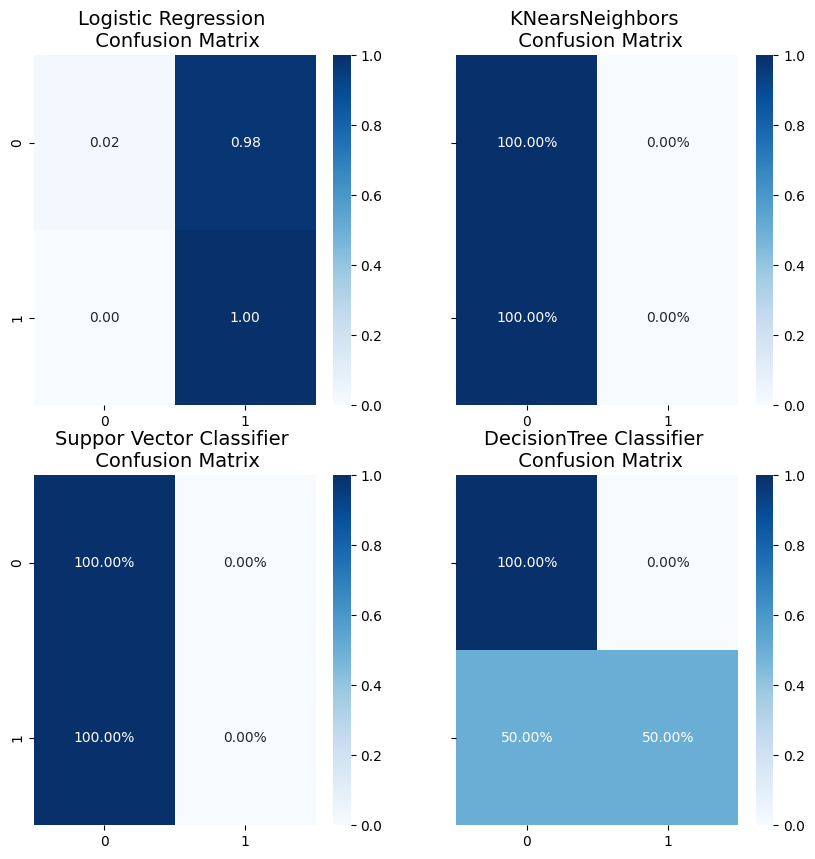

In [33]:
y_pred_log_reg = best_est.predict(X_test)

# Другие модели
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg, normalize='true')
kneighbors_cf = confusion_matrix(y_test, y_pred_knear, normalize='true')
svc_cf = confusion_matrix(y_test, y_pred_svc, normalize='true')
tree_cf = confusion_matrix(y_test, y_pred_tree, normalize='true')

fig,  ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(10,10), sharey=True)
# Построим матрицы ошибок
sns.heatmap(ax=ax1, data=log_reg_cf, annot=True, fmt='.2f', cmap='Blues')
ax1.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)



#
sns.heatmap(ax=ax2,data=kneighbors_cf, annot=True, fmt='.2%', cmap='Blues')
ax2.set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)


#
sns.heatmap(ax=ax3, data=svc_cf, annot=True,
            fmt='.2%', cmap='Blues')
ax3.set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)



#
sns.heatmap(ax=ax4, data=tree_cf, annot=True,
            fmt='.2%', cmap='Blues')
ax4.set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)


plt.show()

Выведем основные метрики моделей.

Давайте вспомним основные метрики качества классификации на примере нашей задачи:

* **Confusion matrix** : так же известна как матрица ошибок, состоит из 4 частей:

    * true positive (TP) : транзакция была мошеннической и модель предсказала ее как мошенническую
    * true negative (TN) : транзакция была нормальной и модель определила ее как нормальную
    * false positive (FP) : транзакция была нормальная, но модель среагировала на нее как на мошенническую
    * false negative (FN) : транзакция была мошенническая, но модель ее пропустила и посчитала нормальной


* **Метрики** :

    * Accuracy : (TP +TN) / (TP + TN + FP +FN)
    * Precision : TP / (TP + FP) (подходит при дисбалансе)
    * Recall : TP / (TP + FN) (подходит при дисбалансе)
    * F1 score : 2 x ((Precision x Recall) / (Precision + Recall)) (подходит при дисбалансе)

* **Roc-кривая** : ROC-кривая строится путем отрисовки графика зависимости частоты истинных положительных результатов (TPR) от частоты ложных положительных результатов (FPR) при различных пороговых значениях.

In [34]:
from sklearn.metrics import classification_report



print('Logistic Regression:')
#
y_pred=  best_est.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('KNears Neighbors:')
#
y_pred=  knears_neighbors.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('Support Vector Classifier:')
#
y_pred=  svc.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('Decision Tree Classifier:')
#
y_pred=  tree_clf.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))



Logistic Regression:
              precision    recall  f1-score   support

   Non Fraud       1.00      0.99      1.00     56863
       Fraud       0.14      0.86      0.23        98

    accuracy                           0.99     56961
   macro avg       0.57      0.92      0.61     56961
weighted avg       1.00      0.99      0.99     56961

KNears Neighbors:
              precision    recall  f1-score   support

   Non Fraud       1.00      0.99      0.99     56863
       Fraud       0.00      0.00      0.00        98

    accuracy                           0.99     56961
   macro avg       0.50      0.49      0.50     56961
weighted avg       1.00      0.99      0.99     56961

Support Vector Classifier:
              precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00     56863
       Fraud       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted

Что мы имеем:
*   Logistic Regression: самая высокая точность и полнота мошенничества и не мошенничества.
*   KNN: ноль мошенников, низкая точность для f1-скора.
*   SVC: ноль мошенников.
*   Decision Tree Classifier: ноль мошенников.



Поскольку мы выбрали Decision Tree Classifier в качестве основной модели, давайте сравним ее качество в случае подхода under-sampling и в случае over-sampling.

In [35]:
# Логистическая регрессия с under-sampling
y_pred = log_reg.predict(original_Xtest)
undersample_score = accuracy_score(original_ytest, y_pred)

# Логистическая регрессия с over-sampling
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d = {'Метод': ['Random Under-Sampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df

,Метод,Score
0,Random Under-Sampling,0.984516
1,Oversampling (SMOTE),0.990344


Итак, в данной задаче более оптимальным подходом оказался over-samplimg методом SMOTE.

# ADASYN

- SMOTE — просто создает новые примеры, равномерно распределяя их.
- ADASYN — создаёт новые примеры, фокусируясь на трудных для модели участках.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Предположим, что df - это ваш DataFrame с данными

rob_scaler = RobustScaler()

# Разделяем данные на признаки и цель
X = df.drop('Class', axis=1)
y = df['Class']

# Делим данные на обучающую и тестовую выборки
original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабируем столбцы Amount и Time
original_Xtrain['scaled_amount'] = rob_scaler.fit_transform(original_Xtrain['Amount'].values.reshape(-1, 1))
original_Xtest['scaled_amount'] = rob_scaler.transform(original_Xtest['Amount'].values.reshape(-1, 1))

original_Xtrain['scaled_time'] = rob_scaler.fit_transform(original_Xtrain['Time'].values.reshape(-1, 1))
original_Xtest['scaled_time'] = rob_scaler.transform(original_Xtest['Time'].values.reshape(-1, 1))

original_Xtrain.drop(['Time', 'Amount'], axis=1, inplace=True)
original_Xtest.drop(['Time', 'Amount'], axis=1, inplace=True)

# Преобразуем данные в массивы
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# Определяем уникальные метки классов для обучающего и тестового наборов
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)

print('Распределение классов: \n')
print("Обучающий набор:", train_counts_label / len(original_ytrain))
print("Тестовый набор:", test_counts_label / len(original_ytest))

# Dictionary of tuned classifiers
tuned_classifiers = {
    "LogisiticRegression": log_reg,
    "DecisionTreeClassifier": tree_clf
}

# Используем StratifiedKFold для кросс-валидации
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# Итерация через классификаторы
for key, classifier in tuned_classifiers.items():
    # Шаги для Пайплайна
    steps = [
        ('ada', ADASYN(sampling_strategy='auto')),  # Используем только ADASYN
        ('model', classifier)
    ]

    # Создаем Пайплайн
    FiPipeline = Pipeline(steps=steps)

    # Кросс-валидация
    scores = cross_val_score(FiPipeline, original_Xtrain, original_ytrain, cv=sss)

    accuracy = round(scores.mean() * 100, 2)
    mas[key].append(accuracy)
    # Для сохранения результатов используйте соответствующую логику
    print(f"Classifiers: {key} Has a training score of, {accuracy} % accuracy score")


Распределение классов: 

Обучающий набор: [0.99828392 0.00171608]
Тестовый набор: [0.99822689 0.00177311]
Classifiers: LogisiticRegression Has a training score of, 98.42 % accuracy score
Classifiers: DecisionTreeClassifier Has a training score of, 98.38 % accuracy score


In [37]:
print("\nОкончательные результаты:")
for key, scores in mas.items():
    print(f"{key}: {scores}")


Окончательные результаты:
LogisiticRegression: [90.0, 91.67, 50.46, 99.07, 98.42]
KNearest: [92.0, 91.67, 50.0, 92.91]
Support Vector Classifier: [91.0, 91.67, 46.16, 99.83]
DecisionTreeClassifier: [87.0, 91.67, 60.7, 98.76, 98.38]


In [38]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline

from sklearn.metrics import classification_report

# Пайплайн с только ADASYN
model = Pipeline([
    ('sampling', ADASYN(sampling_strategy='auto')),
    ('classification', log_reg)  # Проверьте, что log_reg инициализирован
])

# Грид поиск для наилучших параметров для ADASYN
ADASYN_KN = GridSearchCV(model, {'sampling__n_neighbors': list(range(1, 10))}, cv=5)
ADASYN_KN.fit(original_Xtrain, original_ytrain)

print("Лучший оценщик:", ADASYN_KN.best_estimator_)
print("Лучшая оценка модели:", ADASYN_KN.best_score_)
print("Лучшие параметры:", ADASYN_KN.best_params_)

# Оценка модели
log_reg_score = cross_val_score(ADASYN_KN.best_estimator_, original_Xtrain, original_ytrain, cv=5)
print(f'Оценка кросс-валидации для логистической регрессии: {round(log_reg_score.mean() * 100, 2)}%')

# Прогнозирование и печать отчета о классификации
labels = ['Non Fraud', 'Fraud']
best_est = ADASYN_KN.best_estimator_
adasyn_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, adasyn_prediction, target_names=labels))


Лучший оценщик: Pipeline(steps=[('sampling', ADASYN(n_neighbors=8)),
                ('classification', LogisticRegression(C=0.001))])
Лучшая оценка модели: 0.9852619105093374
Лучшие параметры: {'sampling__n_neighbors': 8}
Оценка кросс-валидации для логистической регрессии: 98.34%
              precision    recall  f1-score   support

   Non Fraud       1.00      0.98      0.99     56861
       Fraud       0.08      0.83      0.15       101

    accuracy                           0.98     56962
   macro avg       0.54      0.91      0.57     56962
weighted avg       1.00      0.98      0.99     56962



In [39]:
import time
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import ADASYN

# Мы предполагаем, что best_est - это ваша лучшая модель, определенная ранее с помощью GridSearchCV
y_score = best_est.decision_function(original_Xtest)

# Применим ADASYN после кросс-валидации
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
Xadasyn_train, yadasyn_train = adasyn.fit_resample(original_Xtrain, original_ytrain)

# Обучим логистическую регрессию
t0 = time.time()
log_reg_adasyn = grid_log_reg.best_estimator_  # Предполагаем, что grid_log_reg - это ваш GridSearchCV для логистической регрессии
log_reg_adasyn.fit(Xadasyn_train, yadasyn_train)
t1 = time.time()
print("Время обучения: {} сек".format(t1 - t0))


Время обучения: 5.746343612670898 сек


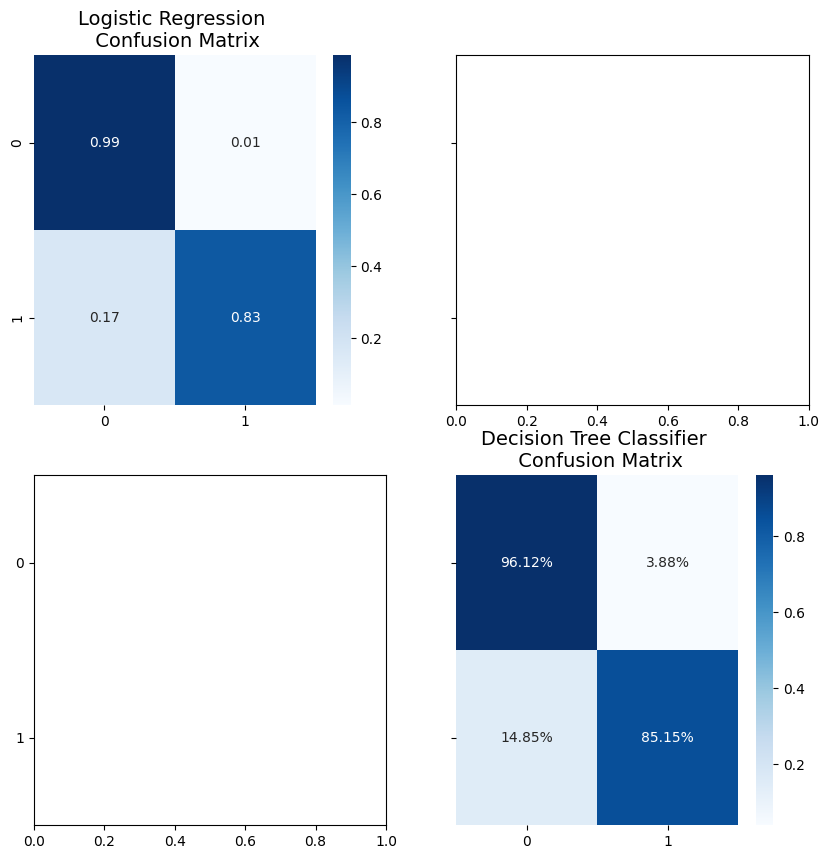

In [40]:
# Прогнозирование для тестового набора
y_pred_log_reg = log_reg_adasyn.predict(original_Xtest)
y_pred_tree = tree_clf.predict(original_Xtest)

# Создание матриц путаницы
log_reg_cf = confusion_matrix(original_ytest, y_pred_log_reg, normalize='true')
tree_cf = confusion_matrix(original_ytest, y_pred_tree, normalize='true')

# Визуализация матриц путаницы
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10), sharey=True)

sns.heatmap(ax=ax1, data=log_reg_cf, annot=True, fmt='.2f', cmap='Blues')
ax1.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)

sns.heatmap(ax=ax4, data=tree_cf, annot=True, fmt='.2%', cmap='Blues')
ax4.set_title("Decision Tree Classifier \n Confusion Matrix", fontsize=14)

plt.show()

In [41]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Оценка моделей
print('Logistic Regression с ADASYN:')
y_pred_log_reg_ad = log_reg_adasyn.predict(original_Xtest)
print(classification_report(original_ytest, y_pred_log_reg_ad, target_names=labels))

print('Decision Tree Classifier:')
y_pred_tree = tree_clf.predict(original_Xtest)
print(classification_report(original_ytest, y_pred_tree, target_names=labels))

# Логистическая регрессия с undersampling
# Предполагаем, что вы уже обучили логистическую регрессию на не сбалансированных данных
y_pred_undersample = best_est.predict(original_Xtest)  # Здесь предполагаем, что best_est это модель без балансировки
undersample_score = accuracy_score(original_ytest, y_pred_undersample)

# Логистическая регрессия с oversampling (ADASYN)
oversample_score = accuracy_score(original_ytest, y_pred_log_reg_ad)

# Соберем результаты в DataFrame
d = {
    'Метод': ['Random Under-Sampling', 'Oversampling (ADASYN)'],
    'Score': [undersample_score, oversample_score]
}
final_df = pd.DataFrame(data=d)

# Перемещение столбца Score
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Показать результаты
print(final_df)


Logistic Regression с ADASYN:
              precision    recall  f1-score   support

   Non Fraud       1.00      0.99      0.99     56861
       Fraud       0.09      0.83      0.16       101

    accuracy                           0.98     56962
   macro avg       0.55      0.91      0.58     56962
weighted avg       1.00      0.98      0.99     56962

Decision Tree Classifier:
              precision    recall  f1-score   support

   Non Fraud       1.00      0.96      0.98     56861
       Fraud       0.04      0.85      0.07       101

    accuracy                           0.96     56962
   macro avg       0.52      0.91      0.53     56962
weighted avg       1.00      0.96      0.98     56962

                   Метод     Score
0  Random Under-Sampling  0.982848
1  Oversampling (ADASYN)  0.984920


In [42]:
print("\nОкончательные результаты:")
for key, scores in mas.items():
    print(f"{key}: {scores}")


Окончательные результаты:
LogisiticRegression: [90.0, 91.67, 50.46, 99.07, 98.42]
KNearest: [92.0, 91.67, 50.0, 92.91]
Support Vector Classifier: [91.0, 91.67, 46.16, 99.83]
DecisionTreeClassifier: [87.0, 91.67, 60.7, 98.76, 98.38]
